In [2]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Put Colab in the context of this challenge
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab Notebooks/academic')

In [21]:
#!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=e8916170f9f60e70d678823581731d49462e3255bb025e7b3b4602f228517570
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [20]:
#!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.7 MB/s eta 0:00:00


In [33]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import ydata_profiling
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

https://www.kaggle.com/competitions/playground-series-s4e6/<br><br>
高等教育を受ける学生の退学リスクの予測を行う。<br>
評価はaccuracyで行う。<br>
このコンペ用のtrain・testデータセットは「<a href="https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success">学生のドロップアウトと学業成績の予測データセット</a>」でトレーニングされたディープラーニングモデルから生成されており、originalデータは自由に使用可能となっている。<br>

## 準備

In [6]:
#データの読み込み
train_df = pd.read_csv("train.csv")
train_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [7]:
original_df = pd.read_csv("data.csv", delimiter=";")
original_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [9]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

→欠損値はないが、Targetのカテゴリカル変数への変換の必要性あり

In [10]:
train_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Targetのカテゴリカル変数への変換
target_dict = {"Dropout":0 , "Enrolled":1, "Graduate":2}
train_df['Target'] = train_df['Target'].replace(target_dict)
original_df['Target'] = original_df['Target'].replace(target_dict)
# カラムを揃えるため適当な数値を入力
original_df['id'] = 0

In [11]:
# 相関の低いカラムを特定（後ほど削除を行う）
correlation_matrix = train_df.corr()
correlation_matrix[abs(correlation_matrix["Target"]) < 0.015].index.tolist()

['id',
 'Nacionality',
 "Father's qualification",
 'Educational special needs',
 'International']

In [12]:
# 相関の高いカラムを特定
correlation_matrix[abs(correlation_matrix["Target"]) > 0.7].index.tolist()

['Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Target']

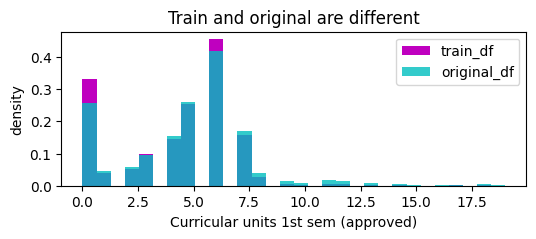

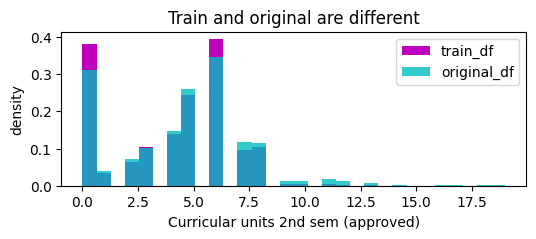

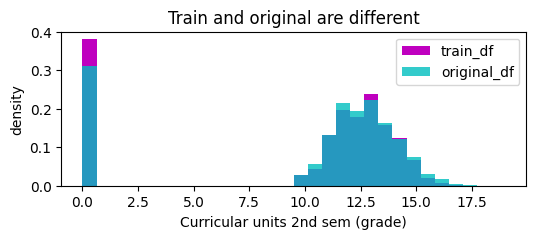

In [13]:
# 相関の高いカラム['Curricular units 2nd sem (approved)']について、trainデータとoriginalデータの分布を比較
plt.figure(figsize=(6, 2))
plt.hist(train_df['Curricular units 1st sem (approved)'],
         bins=np.linspace(0, 19, 31),
         density=True,
         color='m',
         label='train_df')
plt.hist(original_df['Curricular units 1st sem (approved)'],
         bins=np.linspace(0, 19, 31),
         density=True,
         alpha=0.8,
         color='c',
         label='original_df')
plt.xlabel('Curricular units 1st sem (approved)')
plt.ylabel('density')
plt.title('Train and original are different')
plt.legend()
plt.show()

plt.figure(figsize=(6, 2))
plt.hist(train_df['Curricular units 2nd sem (approved)'],
         bins=np.linspace(0, 19, 31),
         density=True,
         color='m',
         label='train_df')
plt.hist(original_df['Curricular units 2nd sem (approved)'],
         bins=np.linspace(0, 19, 31),
         density=True,
         alpha=0.8,
         color='c',
         label='original_df')
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('density')
plt.title('Train and original are different')
plt.legend()
plt.show()

plt.figure(figsize=(6, 2))
plt.hist(train_df['Curricular units 2nd sem (grade)'],
         bins=np.linspace(0, 19, 31),
         density=True,
         color='m',
         label='train_df')
plt.hist(original_df['Curricular units 2nd sem (grade)'],
         bins=np.linspace(0, 19, 31),
         density=True,
         alpha=0.8,
         color='c',
         label='original_df')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('density')
plt.title('Train and original are different')
plt.legend()
plt.show()

→ 分布が近く、サンプル数を増やすという意味でも今回はtrainデータとoriginalデータを結合して使用することとした

・前処理
originalデータ提供先を確認し、一部の数値データが名義尺度であることを確認した。<br>
例：Marital statusについて、「1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated」<br>
これらはone-hot encodingを行うこととした。
また上記レポートのヒストグラムを確認し、正規分布に近く外れ値の少ないものはStandardスケーラーを、その他はRobustスケーラーを行うこととした。<br>
前処理について下記に理由と共にまとめた。

In [14]:
processing_dict = {
    'processing': ['del', 'onehot', 'onehot', 'nothing', 'onehot', 'nothing', 'onehot', 'standard', 'del', 'onehot', 'del', 'onehot', 'onehot', 'standard', 'nothing', 'del', 'nothing', 'nothing', 'nothing', 'nothing', 'robust', 'del', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust', 'robust'],
    'column': ['id', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'],
    'reason': ['unrelated', 'categorical', 'categorical', 'already categorized', 'categorical', 'already categorized', 'categorical', 'Close to normal distribution with no large outliers', 'correlation< 0.015', 'categorical', 'correlation< 0.015', 'categorical', 'categorical', 'Close to normal distribution with no large outliers', 'already categorized', 'correlation< 0.015', 'already categorized', 'already categorized', 'already categorized', 'already categorized', 'heavily skewed', 'correlation< 0.015', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed', 'heavily skewed']
}

processing_df = pd.DataFrame(processing_dict)
processing_df

,processing,column,reason
0,del,id,unrelated
1,onehot,Marital status,categorical
2,onehot,Application mode,categorical
3,nothing,Application order,already categorized
4,onehot,Course,categorical
5,nothing,Daytime/evening attendance,already categorized
6,onehot,Previous qualification,categorical
7,standard,Previous qualification (grade),Close to normal distribution with no large out...
8,del,Nacionality,correlation< 0.015
9,onehot,Mother's qualification,categorical


In [15]:
# originalデータのカラム名の不正コードを削除
original_df.columns = original_df.columns.str.replace('\t', '')

# trainデータとoriginalデータをカラム順序をtrainデータに合わせたうえで結合
original_df = original_df[train_df.columns]
train_original_df = pd.concat([train_df, original_df], axis=0)
train_original_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,1,1,6,9773,1,1,125.0,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,0,1,1,2,9773,1,1,120.0,105,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,0,1,1,1,9500,1,1,154.0,1,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,0,1,1,1,9147,1,1,180.0,1,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


## トレーニング

In [16]:
# 目的変数と特徴量を定義
y_concat = train_original_df["Target"]
X_concat = train_original_df.drop("Target", axis=1)

In [17]:
# onehotencoderのためにすべてのカテゴリを集約
all_categories = [np.unique(X_concat.iloc[:, i]) for i, p in enumerate(processing_dict['processing']) if p == 'onehot']
all_categories

[array([1, 2, 3, 4, 5, 6]),
 array([ 1,  2,  3,  4,  5,  7,  9, 10, 12, 15, 16, 17, 18, 26, 27, 35, 39,
        42, 43, 44, 51, 53, 57]),
 array([  33,   39,  171,  979, 8014, 9003, 9070, 9085, 9119, 9130, 9147,
        9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]),
 array([ 1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 14, 15, 17, 19, 36, 37, 38,
        39, 40, 42, 43]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 18, 19, 22,
        26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  38,
         90,  99, 101, 103, 122, 123, 124, 125, 127, 131, 132, 134, 141,
        143, 144, 151, 152, 153, 163, 171, 172, 173, 175, 191, 192, 193,
        194]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  19,  22,  39,  90,  96,  99, 101, 102, 103, 112, 114, 121,
        122, 123, 124, 125, 131, 132, 134, 135, 141, 143, 144, 148, 151,
        1

In [23]:
# 前処理をColumnTransformerに集約
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, categories=all_categories), [i for i, p in enumerate(processing_dict['processing']) if p == 'onehot']),
        ('standard', StandardScaler(), [i for i, p in enumerate(processing_dict['processing']) if p == 'standard']),
        ('robust', RobustScaler(), [i for i, p in enumerate(processing_dict['processing']) if p == 'robust']),
        ('nothing', 'passthrough', [i for i, p in enumerate(processing_dict['processing']) if p == 'nothing']),
        ('del', 'drop', [i for i, p in enumerate(processing_dict['processing']) if p == 'del'])
    ]
)

In [24]:
# 目的変数{"Dropout":0 , "Enrolled":1, "Graduate":2}に分布の偏りがあることからStratifiedKFoldを使用してクロスバリデーションを行う
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
def cross_validate(model, param_distributions):
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),
        ('model', model)
    ])

    random_search = RandomizedSearchCV(
        pipeline, param_distributions=param_distributions,
        n_iter=10, cv=kf, verbose=1, n_jobs=-1, random_state=42,
        scoring='accuracy'
    )

    random_search.fit(X_concat, y_concat)

    print("Best parameters found: ", random_search.best_params_)
    print("Best cross-validation accuracy: {:.5f}".format(random_search.best_score_))

    results = random_search.cv_results_
    for mean_score, params in zip(results['mean_test_score'], results['params']):
        print(f"Mean CV score: {mean_score:.5f} for parameters: {params}")

    return random_search.best_estimator_, random_search.best_params_, random_search.best_score_

In [22]:
# XGBClassifier
xgb_param_dist = {
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)

xgb_best_model, xgb_best_params, xgb_best_score = cross_validate(xgb, xgb_param_dist)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'model__subsample': 0.6, 'model__n_estimators': 300, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
Best cross-validation accuracy: 0.83151
Mean CV score: 0.83151 for parameters: {'model__subsample': 0.6, 'model__n_estimators': 300, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
Mean CV score: 0.82873 for parameters: {'model__subsample': 0.6, 'model__n_estimators': 300, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
Mean CV score: 0.81121 for parameters: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__max_depth': 5, 'model__learning_rate': 0.001, 'model__colsample_bytree': 0.8}
Mean CV score: 0.80892 for parameters: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__max_depth': 5, 'model__learning_rate': 0.001, 'model__colsample_bytree': 1.0}
Mean CV score: 0.81597 for parameters: {'model__subsample': 0.8, 'model__n_estimators'

In [23]:
# LGBMClassifier
lgbm_param_dist = {
    'model__learning_rate': [0.1, 0.05, 0.01],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, -1],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

lgbm = LGBMClassifier(random_state=42)

lgbm_best_model, lgbm_best_params, lgbm_best_score = cross_validate(lgbm, lgbm_param_dist)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 80942, number of used features: 134
[LightGBM] [Info] Start training from score -1.108433
[LightGBM] [Info] Start training from score -1.637909
[LightGBM] [Info] Start training from score -0.743308
Best parameters found:  {'model__subsample': 0.6, 'model__n_estimators': 200, 'model__max_depth': -1, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
Best cross-validation accuracy: 0.83048
Mean CV score: 0.83048 for parameters: {'model__subsample': 0.6, 'model__n_estimators': 200, 'model__max_depth': -1, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
Mean CV score: 0.82796 for parameters: {'m

In [29]:
# CatBoostClassifier
cat_param_dist = {
    'model__depth': [4, 7, 10],
    'model__learning_rate': [0.01, 0.1, 0.15],
    'model__l2_leaf_reg': [1,4,9]
}

cat = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU')

cat_best_model, cat_best_params, cat_best_score = cross_validate(cat, cat_param_dist)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 4, 'model__depth': 7}
Best cross-validation accuracy: 0.83129
Mean CV score: 0.83032 for parameters: {'model__learning_rate': 0.15, 'model__l2_leaf_reg': 9, 'model__depth': 4}
Mean CV score: 0.83129 for parameters: {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 4, 'model__depth': 7}
Mean CV score: 0.82480 for parameters: {'model__learning_rate': 0.01, 'model__l2_leaf_reg': 1, 'model__depth': 7}
Mean CV score: 0.82581 for parameters: {'model__learning_rate': 0.01, 'model__l2_leaf_reg': 4, 'model__depth': 10}
Mean CV score: 0.82154 for parameters: {'model__learning_rate': 0.01, 'model__l2_leaf_reg': 1, 'model__depth': 4}
Mean CV score: 0.82820 for parameters: {'model__learning_rate': 0.15, 'model__l2_leaf_reg': 1, 'model__depth': 7}
Mean CV score: 0.83069 for parameters: {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 9, 'model__depth': 7}
Mean CV score: 0.83101 for parameters: {'model__learning_rate': 0

In [ ]:
# best_model保存前にcolabのGPU接続が切れたため値を保存

In [51]:
X_concat_processing = column_transformer.fit_transform(X_concat)
X_concat_processing

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [29]:
xgb_best_params = {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
xgb_best_model_nonprocessing = XGBClassifier(**xgb_best_params, random_state=42)

In [30]:
lgbm_best_params = {'subsample': 0.6, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
lgbm_best_model_nonprocessing = LGBMClassifier(**lgbm_best_params, random_state=42)

In [31]:
cat_best_params = {'learning_rate': 0.1, 'l2_leaf_reg': 4, 'depth': 7}
cat_best_model_nonprocessing = CatBoostClassifier(**cat_best_params, random_state=42)

In [34]:
# XGBClassifierとLGBMClassifierとCatBoostClassifierをStacking
stacking = StackingClassifier(
    estimators=[('xgb', xgb_best_model_nonprocessing), ('lgbm', lgbm_best_model_nonprocessing), ('cat', cat_best_model_nonprocessing)],
    final_estimator=LogisticRegression(max_iter=5000, random_state=42),
    cv=5, n_jobs=-1
)

In [35]:
# パイプラインを再構築
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', stacking)
])

In [36]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(categories=[array([1, 2, 3, 4, 5, 6]),
                                                                            array([ 1,  2,  3,  4,  5,  7,  9, 10, 12, 15, 16, 17, 18, 26, 27, 35, 39,
       42, 43, 44, 51, 53, 57]),
                                                                            array([  33,   39,  171,  979, 8014, 9003, 9070, 9085, 9119, 9130, 9147,
       9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]),
                                                                            array([ 1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 14, 15, 17, 19, 36, 37, 38,
       39, 40, 42,...
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=300,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...)),
                                                ('lgbm',
                                                 LGBMClassifier(colsample_bytree=0.6,
                                                                n_estimators=200,
                                                                random_state=42,
                                                                subsample=0.6)),
                                                ('cat',
                                                 <catboost.core.CatBoostClassifier object at 0x7fc61a692c20>)],
                                    final_estimator=LogisticRegression(max_iter=5000,
                                                                       random_state=42),
                                    n_jobs=-1))])

In [37]:
model_cv = cross_val_score(pipeline, X_concat, y_concat, scoring='accuracy', cv=kf, n_jobs=-1)

In [42]:
print(model_cv)
print(model_cv.mean())

[0.8327877  0.83155229 0.83148011 0.83104769 0.83302446]
0.8319784489747475


## 予測結果の提出

In [38]:
X_test = pd.read_csv("test.csv")
X_test

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [39]:
X_test_ids = X_test['id']
X_test_ids

0         76518
1         76519
2         76520
3         76521
4         76522
          ...  
51007    127525
51008    127526
51009    127527
51010    127528
51011    127529
Name: id, Length: 51012, dtype: int64

In [40]:
pipeline.fit(X_concat, y_concat)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(categories=[array([1, 2, 3, 4, 5, 6]),
                                                                            array([ 1,  2,  3,  4,  5,  7,  9, 10, 12, 15, 16, 17, 18, 26, 27, 35, 39,
       42, 43, 44, 51, 53, 57]),
                                                                            array([  33,   39,  171,  979, 8014, 9003, 9070, 9085, 9119, 9130, 9147,
       9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]),
                                                                            array([ 1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 14, 15, 17, 19, 36, 37, 38,
       39, 40, 42,...
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=300,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...)),
                                                ('lgbm',
                                                 LGBMClassifier(colsample_bytree=0.6,
                                                                n_estimators=200,
                                                                random_state=42,
                                                                subsample=0.6)),
                                                ('cat',
                                                 <catboost.core.CatBoostClassifier object at 0x7fc61a692c20>)],
                                    final_estimator=LogisticRegression(max_iter=5000,
                                                                       random_state=42),
                                    n_jobs=-1))])

In [43]:
y_test = pipeline.predict(X_test)
y_test

array([0, 2, 2, ..., 0, 0, 0])

In [44]:
reverse_target_dict = {v: k for k, v in target_dict.items()}

# y_testをテキストラベルに変換
y_test_text = np.array([reverse_target_dict[label] for label in y_test])

y_test_text

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype='<U8')

In [45]:
results = pd.concat([X_test_ids, pd.Series(y_test_text, name="Target")], axis=1)
results

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [46]:
results.to_csv("submission_stacking_xgb_lgbm_cat.csv", header=True, index=False)